# Tasca M4 T02

## Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.
- Ya fue realizado el nombre del archivo es "Visualització gràfica de múltiples variables Exc 1. 

## Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ds_movies = pd.read_csv('movies.dat.txt', sep ='::', encoding = 'ISO-8859-1', engine='python', header = None, names = ['id', 'Titulo', 'Genero'], index_col='id')
ds_movies

,Titulo,Genero
id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


In [25]:
df_movies = pd.DataFrame(ds_movies)
df_movies

,Titulo,Genero
id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


In [26]:
df_movies.shape

(3883, 2)

In [27]:
df_movies.head()

,Titulo,Genero
id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [29]:
df_movies.columns

Index(['Titulo', 'Genero'], dtype='object')

In [30]:
df_movies.Genero.nunique()

301

In [7]:
df_movies.describe().round(3)

,Título,Género
count,3883,3883
unique,3883,301
top,Toy Story (1995),Drama
freq,1,843


- Se corta el año de la columna "Título" y crea la nueva columna Año ("Any")

In [31]:
df_movies['Any'] = df_movies.Titulo.str.slice(-5,-1)
df_movies['Titulo'] = df_movies.Titulo.str.slice(0,-6)

df_movies.head(10)

,Titulo,Genero,Any
id,,,
1,Toy Story,Animation|Children's|Comedy,1995
2,Jumanji,Adventure|Children's|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama,1995
5,Father of the Bride Part II,Comedy,1995
6,Heat,Action|Crime|Thriller,1995
7,Sabrina,Comedy|Romance,1995
8,Tom and Huck,Adventure|Children's,1995
9,Sudden Death,Action,1995


In [32]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titulo  3883 non-null   object
 1   Genero  3883 non-null   object
 2   Any     3883 non-null   object
dtypes: object(3)
memory usage: 121.3+ KB


In [33]:
df_movies['Any'] = df_movies.Any.astype(int)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titulo  3883 non-null   object
 1   Genero  3883 non-null   object
 2   Any     3883 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 106.2+ KB


- Se elimina la "|"

In [34]:
df_movies['Genero'] = df_movies.Genero.str.split('|')

df_movies.head(10)

,Titulo,Genero,Any
id,,,
1,Toy Story,"[Animation, Children's, Comedy]",1995
2,Jumanji,"[Adventure, Children's, Fantasy]",1995
3,Grumpier Old Men,"[Comedy, Romance]",1995
4,Waiting to Exhale,"[Comedy, Drama]",1995
5,Father of the Bride Part II,[Comedy],1995
6,Heat,"[Action, Crime, Thriller]",1995
7,Sabrina,"[Comedy, Romance]",1995
8,Tom and Huck,"[Adventure, Children's]",1995
9,Sudden Death,[Action],1995


- Cambio el orden de las columnas

In [35]:
col = df_movies.pop('Any')
df_movies.insert(loc= 1 , column= 'Any', value= col)
df_movies

,Titulo,Any,Genero
id,,,
1,Toy Story,1995,"[Animation, Children's, Comedy]"
2,Jumanji,1995,"[Adventure, Children's, Fantasy]"
3,Grumpier Old Men,1995,"[Comedy, Romance]"
4,Waiting to Exhale,1995,"[Comedy, Drama]"
5,Father of the Bride Part II,1995,[Comedy]
...,...,...,...
3948,Meet the Parents,2000,[Comedy]
3949,Requiem for a Dream,2000,[Drama]
3950,Tigerland,2000,[Drama]


- Se corta los géneros para que quede solo uno. 

In [37]:
df_movies['Genero'] = df_movies.Genero.str[0].str.strip() #str[posisición que queremos conservar].str.strip() corto y me quedo con lo que me interesa
df_movies.head(10)

,Titulo,Any,Genero
id,,,
1,Toy Story,1995,Animation
2,Jumanji,1995,Adventure
3,Grumpier Old Men,1995,Comedy
4,Waiting to Exhale,1995,Comedy
5,Father of the Bride Part II,1995,Comedy
6,Heat,1995,Action
7,Sabrina,1995,Comedy
8,Tom and Huck,1995,Adventure
9,Sudden Death,1995,Action


## Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.



In [38]:
df_movies_gen = df_movies.Genero.value_counts()
df_movies_gen

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: Genero, dtype: int64

Text(0, 0.5, 'Número de Películas')

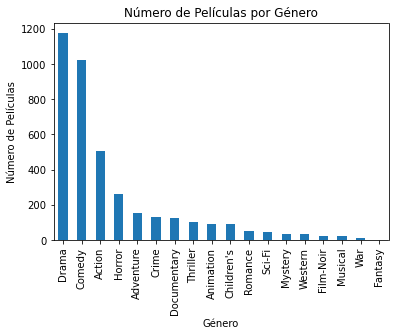

In [39]:
df_movies_gen.plot.bar()
plt.title('Número de Películas por Género')
plt.xlabel('Género')
plt.ylabel('Número de Películas')

- En este gráfico podemos observar la cantidad de películas por género, siendo 'Drama' el género con mayor número de películas.

In [15]:
df_movies_any = df_movies.Any.value_counts()
df_movies_any

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: Any, Length: 81, dtype: int64

In [16]:
df_movies_any.sort_values(ascending=True)

1921      1
1920      2
1922      2
1919      3
1923      3
       ... 
1999    283
1997    315
1998    337
1995    342
1996    345
Name: Any, Length: 81, dtype: int64

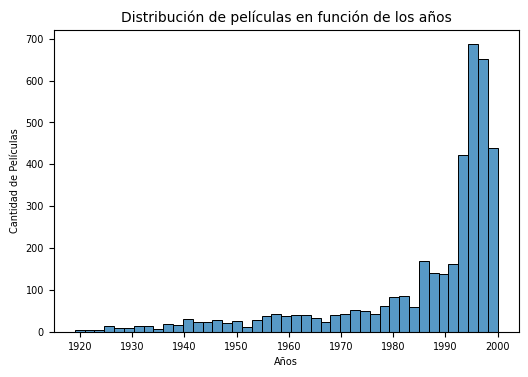

In [17]:
plt.figure(dpi=100)
a= sns.histplot(x='Any', data= df_movies)
a.set_title('Distribución de películas en función de los años', fontsize=10)
a.set_xlabel('Años',fontsize=7)
a.set_ylabel('Cantidad de Películas', fontsize=7)
a.tick_params(labelsize=7)
plt.show()

- Este gráfico muestra la distribución del número de películas en función de los años. Tiene una forma forma está sesgada a la derecha o también se dice sesgada hacia el extremo positivo. También se observa que tiene un pico (valor que corresponde a la moda) ubicado en la década de los 90', por lo tanto se denomina unimodal. Se puede concluir que hay un aumento significativo, en esa década, en el número de películas. 
- info útil : http://localhost:8889/notebooks/Programaci%C3%B3n%20IT/Data%20Science/Especializaci%C3%B3n%20Ciencia%20de%20datos/Sprint%204/Examining-Data-main/Examining-Data-main/Visualitzaci%C3%B3%20gr%C3%A0fica%20de%20m%C3%BAltiples%20variables.%20Exc%201.ipynb